In [1]:
# src_path로부터 ESS데이터가 저장된 csv 파일을 읽어서
# 데이터 가공 작업 실시 후 result_path에 저장
# 데이터 가공은 충전량 및 방전량 누적치 계산
# 원본은 done_path로 이동

import pandas as pd
import os
import datetime
import shutil

In [2]:
result_path = '..\\new_result\\'
src_path = '..\\new_result\\'

filename = ''
file_list = os.listdir(src_path)
file_list.sort()

In [3]:
def read_file(system_id, ess_id):
    global filename
    filename = 'accumulate_ess_' + system_id + '_' + ess_id + '.csv'
    df = pd.read_csv(src_path + filename, parse_dates=['C.target_date'], index_col = ['C.target_date'])
    return df

In [4]:
# for i in range(len(file_list)):
#     system_id = file_list[i].split('_')[2]
#     ess_id = file_list[i].split('_')[3].split('.')[0]
#     df = read_file(system_id, ess_id)
#     accumulate_charge(df)

# df = read_file('142', '132')
df = read_file('972', '887')

#    del df

#     shutil.move(csv_path + filename, done_path + filename)

In [5]:
df1 = df[['M.batt1_chg','M.batt1_dis']]
df2 = df1.resample('D').sum()
df2['rolling_chg']=df2['M.batt1_chg'].rolling(window=60).mean()
df2['rolling_dis']=df2['M.batt1_dis'].rolling(window=60).mean()
df2['rolling_diff'] = df2['rolling_dis'].div(df2['rolling_chg']).mul(100)
df['rolling_soh']= df['C.batt1_soh'].rolling(window=96*7).mean()

In [6]:
df['rolling_chg']=df['M.batt1_chg'].rolling(window=96*120).mean()
df['rolling_dis']=df['M.batt1_dis'].rolling(window=96*120).mean()
df['rolling_ratio'] = df['rolling_dis'].div(df['rolling_chg']).mul(100)

In [7]:
df['ratio'] = df['accu_dis_e'].div(df['accu_chg_e']).mul(100)

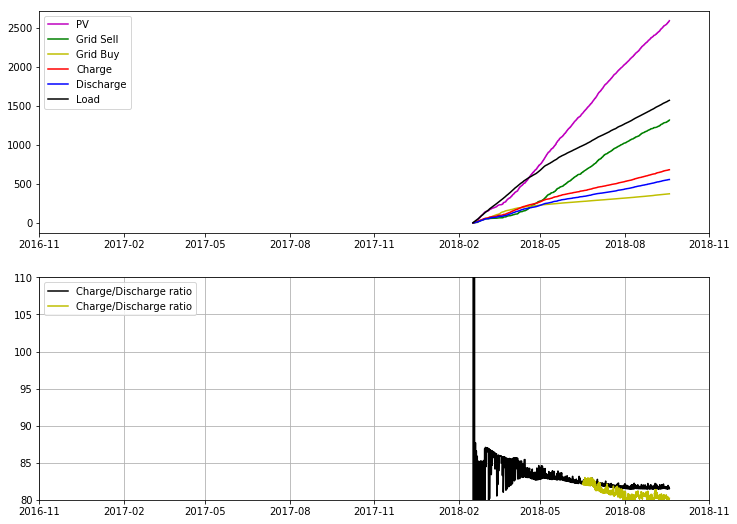

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,9))#, tight_layout=True)

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

# ax1.plot(df.index, df['accu_pv_e'], color='r', label='Grid Buy')
ax1.plot(df.index, df['accu_pv_e'].div(1000), color='m', label='PV')
ax1.plot(df.index, df['accu_sell_e'].div(1000), color='g', label='Grid Sell')
ax1.plot(df.index, df['accu_buy_e'].div(1000), color='y', label='Grid Buy')
ax1.plot(df.index, df['accu_chg_e'].div(1000), color='r', label='Charge')
ax1.plot(df.index, df['accu_dis_e'].div(1000), color='b', label='Discharge')
ax1.plot(df.index, df['accu_load_e'].div(1000), color='k', label='Load')
ax2.plot(df.index, df['ratio'], color='k', label='Charge/Discharge ratio')
ax2.plot(df.index, df['rolling_ratio'], color='y', label='Charge/Discharge ratio')
# ax2.plot(df.index, df['pv_sell_ratio'], color='k', label='PV to Sell ratio')

ax2.set_ylim(bottom=80, top=110)
#ax1.set_ylim(bottom=0, top=3000)
#ax1.set_yticks([1000,2000,3000])
start_date = datetime.datetime(2016, 11, 1)
end_date = datetime.datetime(2018, 11, 1)
ax1.set_xlim(left=start_date, right=end_date)
ax2.set_xlim(left=start_date, right=end_date)

ax1.legend(loc=2)
ax2.legend(loc=2)

plt.grid(True)
plt.show()
del plt